In [58]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras.utils import to_categorical

In [59]:
def convert(x):
    return bin(x)[2:].zfill(40)

In [60]:
x_train, y_train, x_test, y_test = ([] for x in range(4))
with open('../src/data_train.txt','r') as pixels, open('../src/label_train.txt','r') as labels:
    for l in pixels.readlines():
        l1 = map(int, l.split())
        l2 = list(map(convert, l1))
        px = []
        for s in l2: px.append([int(x) for x in s])
        x_train.append(px)
        lb = int(labels.readline())
        y_train.append(lb)
with open('../src/data_test.txt','r') as pixels, open('../src/label_test.txt','r') as labels:
    for l in pixels.readlines():
        l1 = map(int, l.split())
        l2 = list(map(convert, l1))
        px = []
        for s in l2: px.append([int(x) for x in s])
        x_test.append(px)
        lb = int(labels.readline())
        y_test.append(lb)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 40, 40), (60000,), (10000, 40, 40), (10000,))

In [61]:
x_train.reshape(x_train.shape[0],40,40,1)
x_test.reshape(x_test.shape[0],40,40,1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 40, 40), (60000, 10), (10000, 40, 40), (10000, 10))

In [17]:
train_count, features = x_train.shape
test_count = x_test.shape[0]

In [66]:
np.unique(x_test)

array([0, 1])

In [71]:
# first model
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(40,40,1)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 40, 40, 512)       1024      
                                                                 
 dense_24 (Dense)            (None, 40, 40, 128)       65664     
                                                                 
 dense_25 (Dense)            (None, 40, 40, 10)        1290      
                                                                 
Total params: 67,978
Trainable params: 67,978
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=1024, epochs=50, shuffle=True, validation_split=.2)
loss, accuracy  = model.evaluate(x_test, y_test, batch_size=1024)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [67]:
# second model
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(40,40,1)))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 38, 38, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 36, 36, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 18, 18, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 10368)             0         
                                                                 
 dense_21 (Dense)            (None, 128)               1327232   
                                                                 
 dense_22 (Dense)            (None, 10)                1290      
                                                      

10/10 [==============================] - 5s 438ms/step - loss: 0.0791 - accuracy: 0.9872


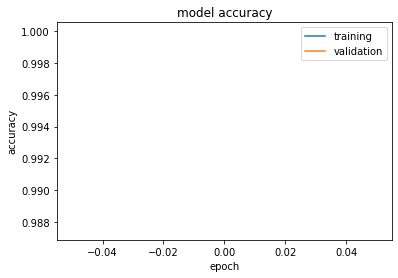

Test loss: 0.0791
Test accuracy: 0.987


In [70]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=1024, epochs=1, shuffle=True, validation_split=.2)
loss, accuracy  = model.evaluate(x_test, y_test, batch_size=1024)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')